### __3. Exploratory Data Analysis (EDA)__

This notebook focuses on the exploratory data analysis (EDA) of the bioactivity IC50 data and other properties of compounds for the PfDHODH target protein. The data has been preprocessed (step_2) in a previous notebook and is now ready for analysis. The notebook begins by loading the prepared data from a CSV file into a pandas DataFrame, which is then displayed for a quick overview.

Subsequent sections of the notebook will employ various EDA techniques to understand underlying patterns in the data, identify outliers, extract important variables, and test underlying assumptions. The insights derived from this EDA will be crucial for the subsequent machine learning steps.

In [14]:
# Open the CSV file
import pandas as pd
df = pd.read_csv('../data/chembl_dataset/03_pfDHODH_bioactivity_data_3category_norm_pIC50.csv')
df

,Unnamed: 0,index,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,0,0,CHEMBL199572,inactive,CN(C(=O)c1ccc(-c2ccccc2)cc1)c1ccccc1C(=O)O,331.371,4.32840,1.0,2.0,42600.0,4.370590
1,1,1,CHEMBL199574,inactive,O=C(Nc1ccccc1C(=O)O)c1ccc2cc(Br)ccc2c1,370.202,4.55280,2.0,2.0,142600.0,3.845880
2,2,2,CHEMBL372561,inactive,CN(C(=O)c1ccc2cc(Br)ccc2c1)c1ccccc1C(=O)O,384.229,4.57710,1.0,2.0,93400.0,4.029653
3,3,3,CHEMBL370865,inactive,O=C(Nc1ccccc1C(=O)O)c1ccc(-c2ccccc2)cc1,317.344,4.30410,2.0,2.0,153500.0,3.813892
4,4,4,CHEMBL199575,inactive,CN(C(=O)c1ccc2ccccc2c1)c1ccccc1C(=O)O,305.333,3.81460,1.0,2.0,200000.0,3.698970
...,...,...,...,...,...,...,...,...,...,...,...
597,597,597,CHEMBL4569109,inactive,Cn1nc(OCC2CC2)c(C(=O)O)c1COc1ccccc1,302.330,2.48610,1.0,5.0,250000.0,3.602060
598,598,598,CHEMBL4568957,inactive,Cn1nc(OCc2ccccc2)c(C(=O)O)c1COc1ccccc1,338.363,3.27630,1.0,5.0,250000.0,3.602060
599,599,599,CHEMBL4449622,inactive,Cn1nc(O)c(C(N)=O)c1COc1ccccc1,247.254,0.80360,2.0,5.0,250000.0,3.602060
600,600,600,CHEMBL1956285,active,Cc1cc(Nc2ccc(S(F)(F)(F)(F)F)cc2)n2nc(C(C)(F)F)...,415.338,5.94542,1.0,5.0,10.0,8.000000


#### __3.1. Bioactivity (IC50) distribution of compounds__

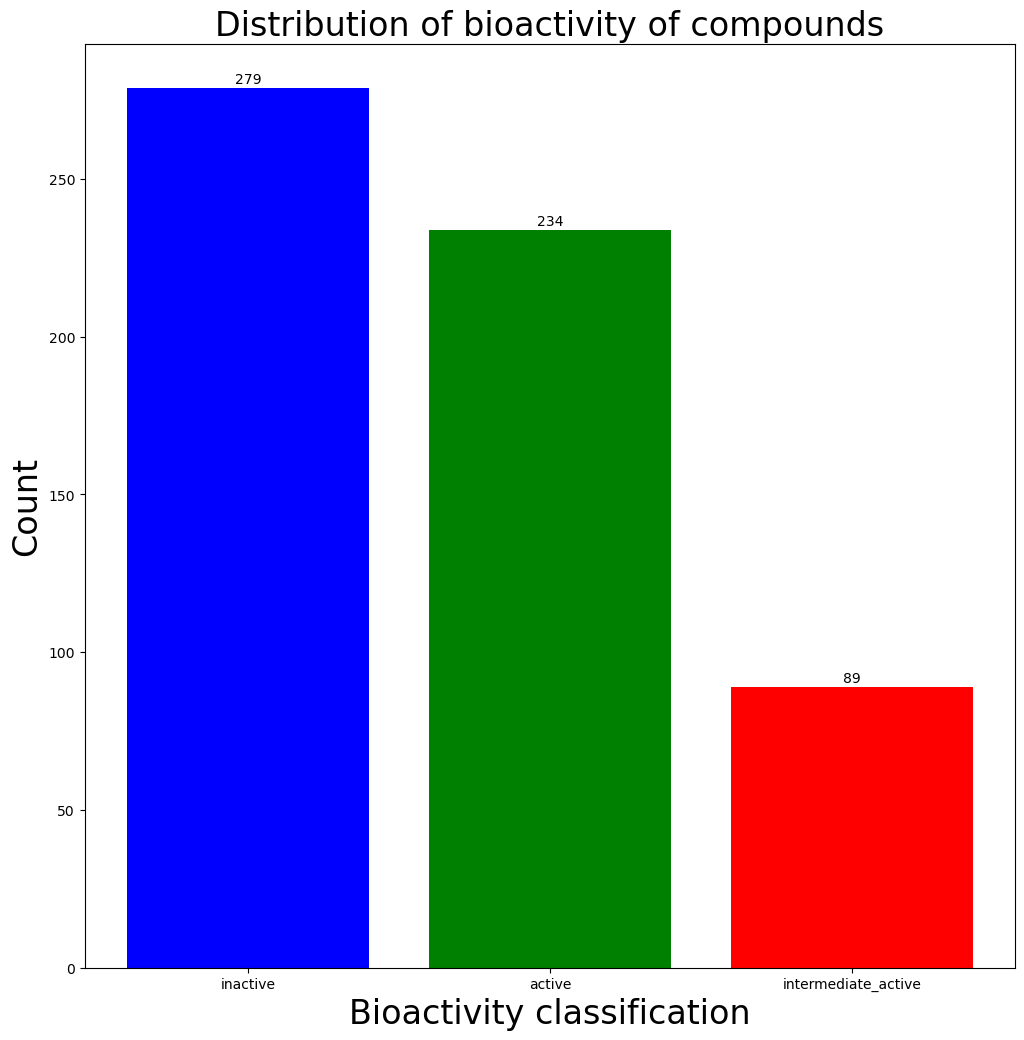

In [15]:
import matplotlib.pyplot as plt

def plot_bioactivity_distribution(dataframe):
    # Get the counts of each bioactivity class
    bioactivity_counts = dataframe['bioactivity_class'].value_counts()

    # Create a new figure with a specified size
    plt.figure(figsize=(12,12))

    # Create a bar plot of the bioactivity counts
    colors = ['blue', 'green', 'red']
    bars = plt.bar(bioactivity_counts.index, bioactivity_counts.values, color=colors)

    # Set the labels and title of the plot
    plt.xlabel('Bioactivity classification', fontsize=24)
    plt.ylabel('Count', fontsize=24)
    plt.title('Distribution of bioactivity of compounds', fontsize=24)

    # Add the count as a label on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, int(height), ha='center', va='bottom')

    # Save the plot as a PNG file
    plt.savefig('../image/Distribution_bioactivity.png')

# Call the function with the DataFrame as argument
plot_bioactivity_distribution(df)

The number of active compounds (234) is not equal to the number of inactive compounds (279), indicating that the data has a somewhat imbalanced distribution.

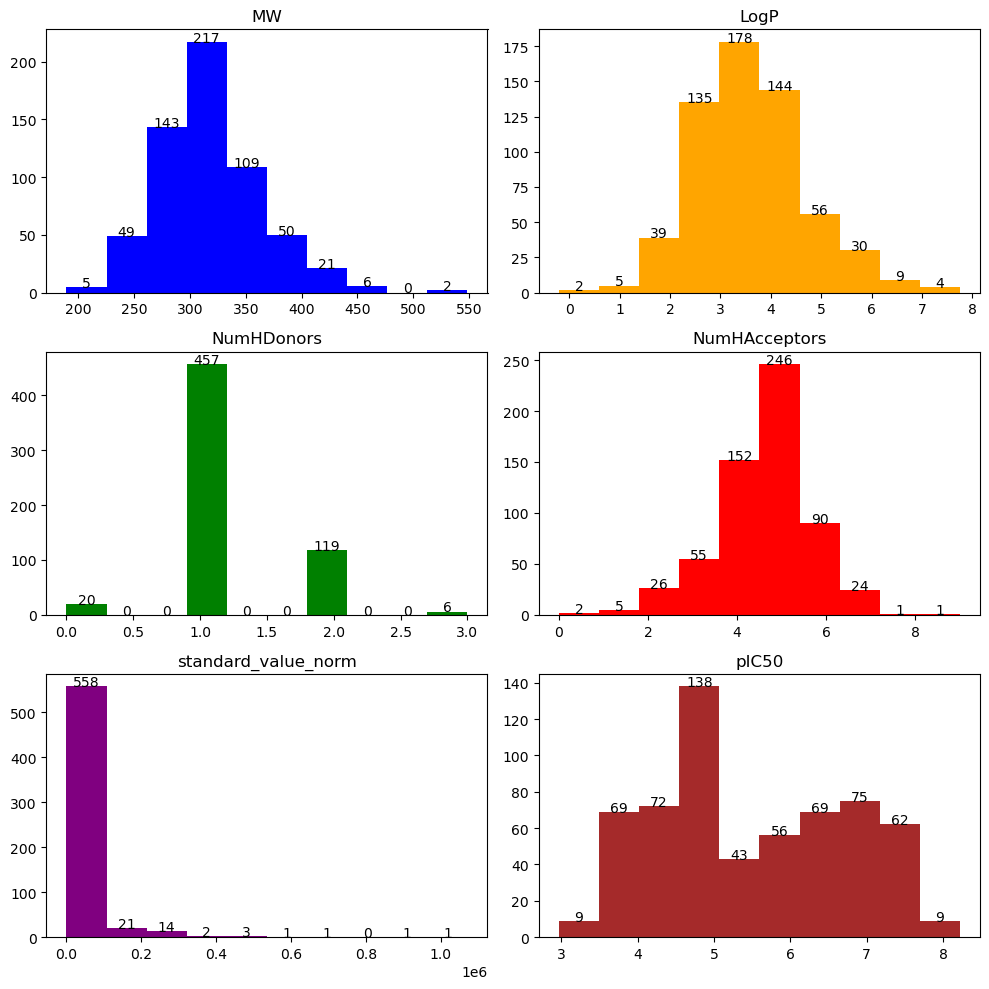

In [16]:
# Plot the distribution of the druglikness properties of compounds
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
columns = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'standard_value_norm', 'pIC50']

for ax, column, color in zip(axs.ravel(), columns, colors):
    n, bins, patches = ax.hist(df[column], color=color)
    ax.set_title(column)
    
    # Add the number of observations on top of each bar
    for i in range(len(patches)):
        p = patches[i]
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.1,
                '{}'.format(int(n[i])), ha='center')

plt.tight_layout()
plt.show()

__MW (Molecular Weight):__ The molecular weight of the compounds ranges from approximately 200 to 550. The majority of the compounds have a molecular weight between 250 and 400, with the highest frequency (217) around 300-350.There are a few compounds with molecular weights outside this range, indicating a fairly concentrated distribution.

__LogP:__ The LogP values represent the lipophilicity of the compounds, range from 0 to 8.
Most compounds have LogP values between 2 and 5, with the peak frequency (178) around 3.
The distribution is somewhat symmetrical, indicating a balanced spread of lipophilicity values.

__NumHDonors (Number of Hydrogen Donors):__ The number of hydrogen donors in the compounds ranges from 0 to 3. A large majority of the compounds have exactly 1 hydrogen donor (457), with fewer compounds having 2 (119) or none (20). This suggests that most compounds have a moderate number of hydrogen donors.

__NumHAcceptors (Number of Hydrogen Acceptors):__ The number of hydrogen acceptors ranges from 0 to 8. The distribution peaks at 4 acceptors (246), with a majority of compounds having between 3 and 5 acceptors. Few compounds have very low (0-1) or very high (6-8) numbers of hydrogen acceptors.
__standard_value_norm (Normalized Standard Value):__ The normalized standard values span a range from 0 to over 1,000,000. The majority of compounds have values clustered around 0, with a peak frequency (558) at the lowest value range. This indicates a highly skewed distribution, with most compounds having low normalized standard values and a few with very high values.

__pIC50:__ The pIC50 values, representing the negative logarithm of the IC50 values, range from 3 to 8. The distribution shows a peak at a pIC50 value of 5 (138), with a fairly even spread between 4 and 7. This suggests a broad range of compound potencies, with a tendency towards moderate activity levels.

#### __Boxplot analysis with pIC50__

A box plot is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. This allows us to observe the distribution pIC50 of values on the sample space. 

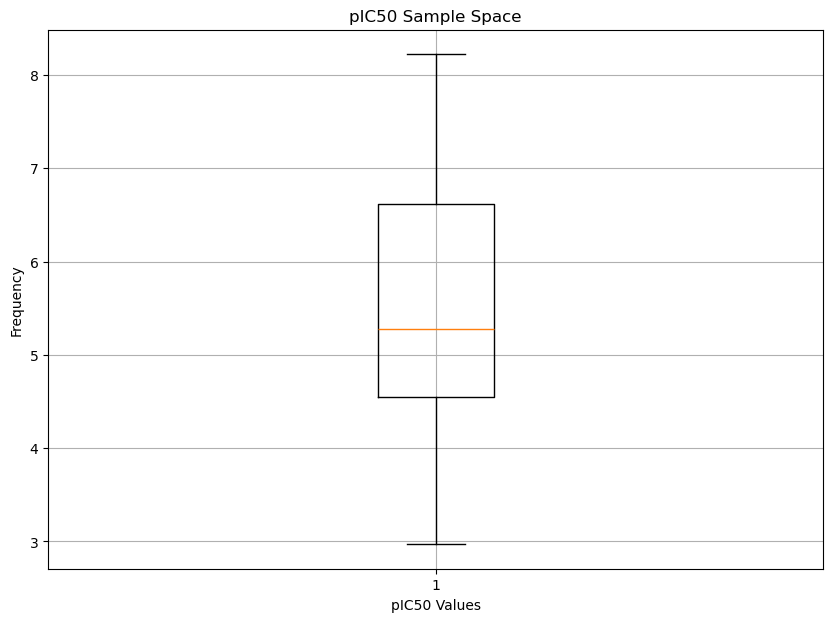

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
# Assuming 'setting' contains the pIC50 values after conversion
setting = df['pIC50']
fig = plt.figure(figsize=(10, 7))
plt.boxplot(setting)
plt.title('pIC50 Sample Space')
plt.xlabel('pIC50 Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
plt.savefig('../image/Boxplot_pIC50.png')

The boxplot suggests that the pIC50 values are relatively concentrated between 4.5 and 6.5, with most values ranging from 3 to 8. `There are no outliers`, indicating a fairly consistent distribution of potencies among the tested substances.

In [18]:
setting = pd.Series(setting)
setting.describe()

count    602.000000
mean       5.541766
std        1.196415
min        2.970000
25%        4.552842
50%        5.275724
75%        6.615357
max        8.221849
Name: pIC50, dtype: float64

The boxplot analysis did not reveal any outliers in the data, which suggests that the data is reliable and can be used for further analysis.

In [19]:
#Just make sure if any missing values in the pIC50 column
df.pIC50.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
597    False
598    False
599    False
600    False
601    False
Name: pIC50, Length: 602, dtype: bool

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           602 non-null    int64  
 1   index                602 non-null    int64  
 2   molecule_chembl_id   602 non-null    object 
 3   bioactivity_class    602 non-null    object 
 4   canonical_smiles     602 non-null    object 
 5   MW                   602 non-null    float64
 6   LogP                 602 non-null    float64
 7   NumHDonors           602 non-null    float64
 8   NumHAcceptors        602 non-null    float64
 9   standard_value_norm  602 non-null    float64
 10  pIC50                602 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 51.9+ KB


In [21]:
df.describe()

,Unnamed: 0,index,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,6.020000e+02,602.000000
mean,300.500000,300.500000,316.861211,3.602771,1.184385,4.626246,3.499551e+04,5.541766
std,173.926709,173.926709,46.980099,1.114006,0.486991,1.198241,9.109785e+04,1.196415
min,0.000000,0.000000,189.222000,-0.204600,0.000000,0.000000,6.000000e+00,2.970000
25%,150.250000,150.250000,285.372000,2.831465,1.000000,4.000000,2.425000e+02,4.552842
50%,300.500000,300.500000,311.410000,3.515810,1.000000,5.000000,5.300000e+03,5.275724
75%,450.750000,450.750000,341.223000,4.289970,1.000000,5.000000,2.800000e+04,6.615357
max,601.000000,601.000000,548.633000,7.755300,3.000000,9.000000,1.071519e+06,8.221849


The df.describe() method is a handy function in Python's Pandas library that generates descriptive statistics for a DataFrame (df) such as count, mean, std, etc. It provides a summary of the central tendency, dispersion, and shape of the distribution of numerical columns in the dataset.

#### __Distribution of molecular weights (MW) across bioactivity classes__

Visualize the distribution of molecular weights across different bioactivity classes.

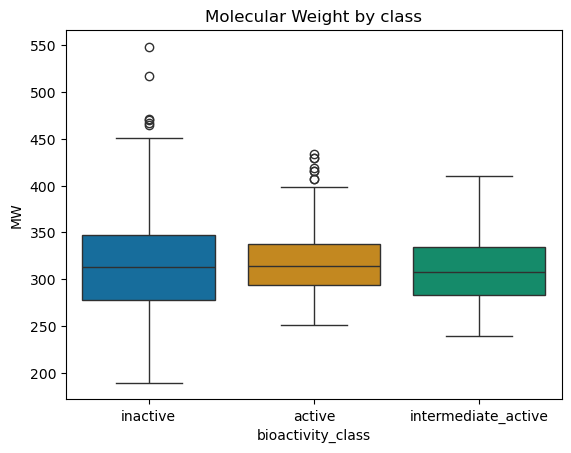

In [22]:
## Obtain the graphs of descriptors to show differences between class (active, inactive, min Effect)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='bioactivity_class', y='MW', data=df, palette='colorblind',hue='bioactivity_class')
plt.title('Molecular Weight by class')
plt.savefig('../image/MW_Dist.png')

The boxplot reveals that while the average molecular weight is similar across the bioactivity classes, there are differences in the spread of the data and the presence of outliers. The inactive class has a wider range of molecular weights and includes some compounds with particularly high molecular weights. In contrast, the active compounds have a more tightly clustered distribution of molecular weights. The mediumactive class appears to be the most consistent, with no outliers and a moderate spread of molecular weights.

#### __Distribution of Number of H-Donors (NumHDonors) across bioactivity classes__


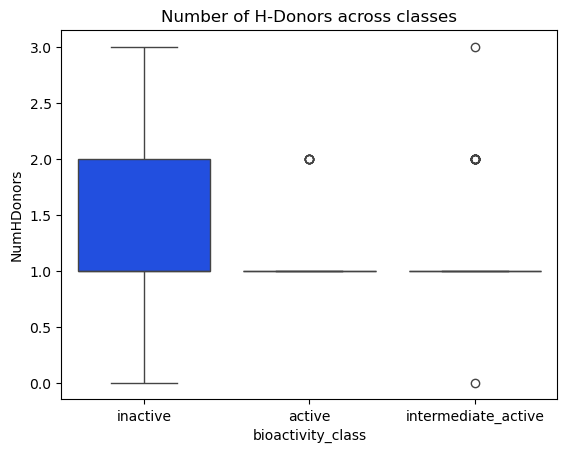

In [23]:
sns.boxplot(x='bioactivity_class', y='NumHDonors', data=df, palette='bright',hue='bioactivity_class')
plt.title('Number of H-Donors across classes')
plt.savefig('../image/NumHDonors_Dist.png')

The number of hydrogen bond donors tends to be lower in the active and mediumactive groups compared to the inactive group.  There's also less variation in the number of donors for the active and mediumactive groups.

This suggests that having fewer hydrogen bond donors might be associated with higher bioactivity. However, the presence of outliers in all groups indicates that the relationship between the number of hydrogen bond donors and bioactivity is not strictly deterministic.

#### __Distribution of Number of H-Acceptors (NumHAcceptors) across bioactivity classes__


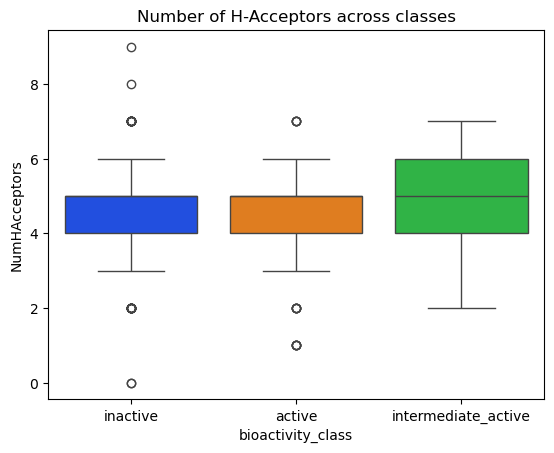

In [24]:
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=df,palette='bright',hue='bioactivity_class')
plt.title('Number of H-Acceptors across classes')
plt.savefig('../image/NumHAcceptors_dist.png')

The number of hydrogen bond acceptors seems to have some relationship with bioactivity. Active and intermediate_active compounds tend to have a more consistent number of hydrogen bond acceptors, while inactive compounds exhibit a broader range. Specifically, higher bioactivity seems to be loosely associated with a higher number of hydrogen bond acceptors, but not excessively high as seen in some outliers from the inactive group.

#### __Distribution of LogP across bioactivity classes__


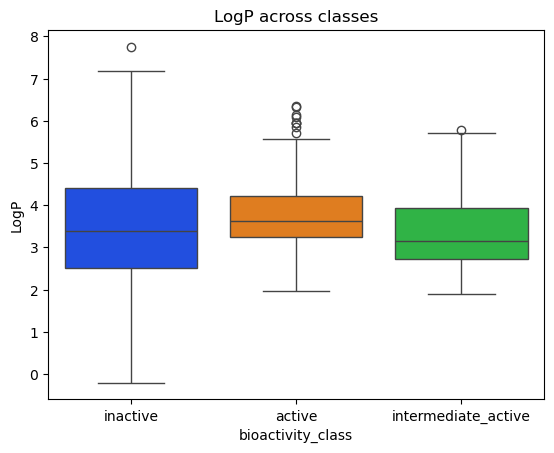

In [25]:
sns.boxplot(x='bioactivity_class', y='LogP', data=df, palette='bright',hue='bioactivity_class')
plt.title('LogP across classes')
plt.savefig('../image/LogP_Dist.png')

The boxplot suggests that there may be a relationship between lipophilicity (logP) and bioactivity. Less lipophilic compounds (lower logP) tend to be more bioactive, while highly lipophilic compounds (high logP) tend to be inactive. However, there is considerable overlap between the groups, indicating that lipophilicity alone is not the sole determinant of bioactivity.